# Assignment 1

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Solve household problem](#toc2_)    
- 3. [Find stationary equilibrium](#toc3_)    
  - 3.1. [Direct approach](#toc3_1_)    
  - 3.2. [Looking at the stationary equilibrium](#toc3_2_)    
    - 3.2.1. [Policy functions](#toc3_2_1_)    
    <!-- - 3.2.2. [Distributions](#toc3_2_2_)     -->
  <!-- - 3.3. [Indirect approach](#toc3_3_)     -->
- 4. [Calculating the Jacobians](#toc4_)
	- 4.1 [The Jacobians](#toc4_1_)
- 5. [Finding transitionpath](#toc5_)
	- 5.1 [Temporary shock to $\varphi_1$](#toc5_1)
	- 5.2 [Permanent shock to $\varphi_2$](#toc5_2)
<!-- - 6. [Extra: Demand vs. supply of capital](#toc6_)     -->

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [2]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']
plt.rcParams.update({"axes.grid" : True, "grid.color": "black", "grid.alpha":"0.25", "grid.linestyle": "--"})
plt.rcParams.update({'font.size': 14})

from HANCModel import HANCModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [3]:
model = HANCModelClass(name='baseline')

par = model.par
ss = model.ss

## 2. <a id='toc2_'></a>[Solve household problem](#toc0_)

Set the steady state values, which matter for the household:

In [4]:
ss.r = 0.01
ss.w0 = 1.00
ss.w1 = 1.00
ss.phi0 = 1.0
ss.phi1 = 2.0

**Solve the household problem** with `.solve_hh_ss()`:
    
1. Calls `.prepare_hh_ss()`
1. Calls `.solve_backwards_hh()` until convergence

In [5]:
# Solving household problem with different values for beta and eta
model.solve_hh_ss(do_print=True)

household problem in ss solved in 5.9 secs [1290 iterations]


In [6]:
model.simulate_hh_ss(do_print=True)

household problem in ss simulated in 3.6 secs [1406 iterations]


## 3. <a id='toc3_'></a>[Find stationary equilibrium](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Direct approach](#toc0_)

In [7]:
model.find_ss(method='direct',do_print=True)

### step 1: broad search ###

guess ss.K = 1.0000
implied ss.r = 0.1777
implied ss.w0 = 0.3703
implied ss.w1 = 0.3703
household problem in ss solved in 0.2 secs [317 iterations]
household problem in ss simulated in 0.0 secs [94 iterations]
implied ss.A_hh = 198.5944
clearing_A = -197.59444763

guess ss.K = 2.0000
implied ss.r = 0.0782
implied ss.w0 = 0.4752
implied ss.w1 = 0.4752
household problem in ss solved in 0.4 secs [598 iterations]
household problem in ss simulated in 0.0 secs [333 iterations]
implied ss.A_hh = 243.8378
clearing_A = -241.83775570

guess ss.K = 3.0000
implied ss.r = 0.0375
implied ss.w0 = 0.5499
implied ss.w1 = 0.5499
household problem in ss solved in 0.8 secs [1005 iterations]
household problem in ss simulated in 2.9 secs [12834 iterations]
implied ss.A_hh = 276.5831
clearing_A = -273.58311581

guess ss.K = 4.0000
implied ss.r = 0.0144
implied ss.w0 = 0.6099
implied ss.w1 = 0.6099
household problem in ss solved in 1.2 secs [1688 iterations]
household problem in 

**Look at the steady state variables:**

In [8]:
for varname in model.varlist:
    print(f'{varname:15s}: {ss.__dict__[varname]:.4f}')

Gamma          : 1.0000
K              : 4.1097
L0             : 0.6667
L1             : 0.6667
rK             : 0.1124
Y              : 1.2831
w0             : 0.6159
w1             : 0.6159
A              : 4.1097
r              : 0.0124
phi0           : 1.0000
phi1           : 2.0000
A_hh           : 4.1097
C_hh           : 0.8722
L0_hh          : 0.6667
L1_hh          : 0.6667
U_hh           : -0.0208
I              : 0.4110
clearing_A     : 0.0000
clearing_L0    : 0.0000
clearing_L1    : 0.0000
clearing_Y     : 0.0000


In [9]:
model.info(only_blocks=True,ss=True)

production_firm: [Gamma=1.00,K=4.11,L0=0.67,L1=0.67] -> [rK=0.11,Y=1.28,w0=0.62,w1=0.62]
mutual_fund: [K=4.11,rK=0.11] -> [A=4.11,r=0.01]
hh: [phi0=1.00,phi1=2.00,r=0.01,w0=0.62,w1=0.62] -> [A_hh=4.11,C_hh=0.87,L0_hh=0.67,L1_hh=0.67,U_hh=-0.02]
market_clearing: [A=4.11,A_hh=4.11,L0=0.67,L1=0.67,L0_hh=0.67,L1_hh=0.67,Y=1.28,C_hh=0.87,K=4.11] -> [I=0.41,clearing_A=0.00,clearing_L0=0.00,clearing_L1=0.00,clearing_Y=0.00]


In [10]:
model.test_path()

shocks: Gamma phi0 phi1 
unknowns: K L0 L1 

look at max(abs(path.VARNAME[:]-ss.VARNAME)):

 blocks.production_firm
  rK               0.0e+00
  Y                0.0e+00
  w0               0.0e+00
  w1               0.0e+00
 blocks.mutual_fund
  A                0.0e+00
  r                0.0e+00
 hh
  A_hh             1.8e-07
  C_hh             3.2e-09
  L0_hh            2.2e-15
  L1_hh            1.6e-15
  U_hh             2.7e-11
 blocks.market_clearing
  I                1.1e-16
  clearing_A       1.8e-07 [target]
  clearing_L0      2.1e-14 [target]
  clearing_L1      1.8e-14 [target]
  clearing_Y       3.2e-09


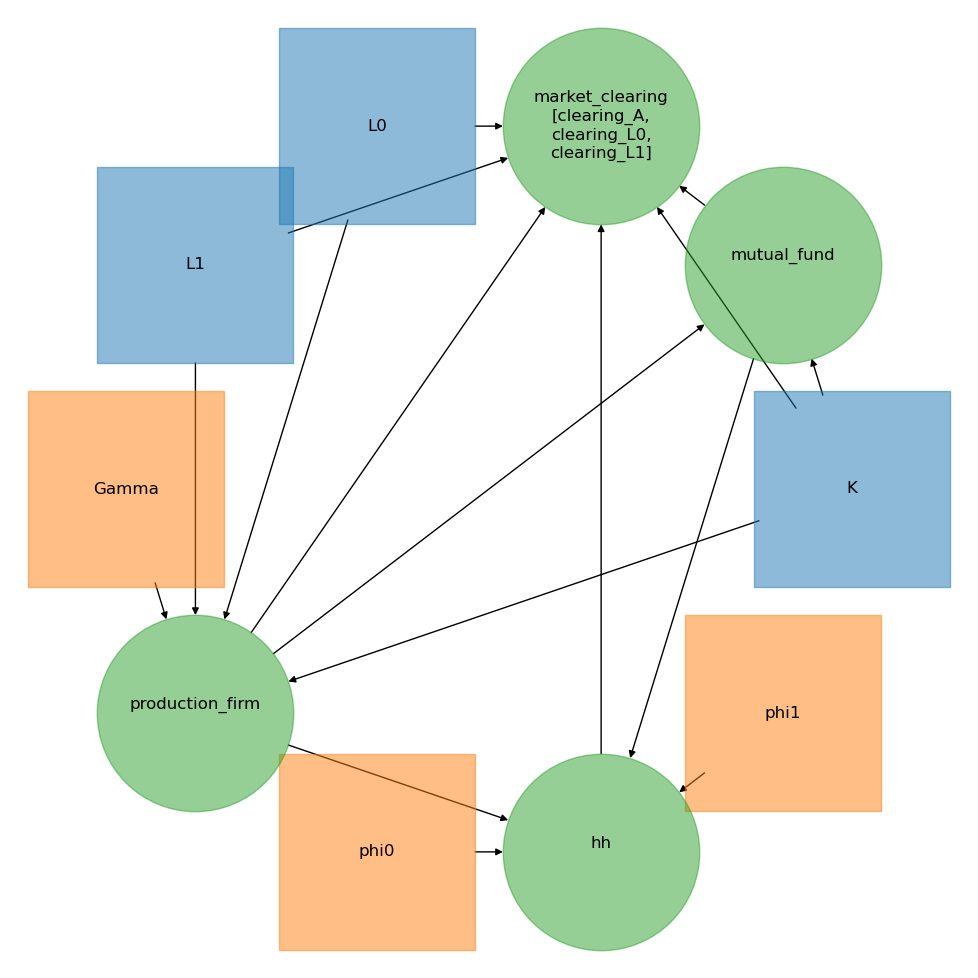

In [11]:
model.draw_DAG(figsize=(10,10), filename='figs/DAG.png')

#### 3.2.2. <a id='toc3_2_2_'></a>[Distributions](#toc0_)

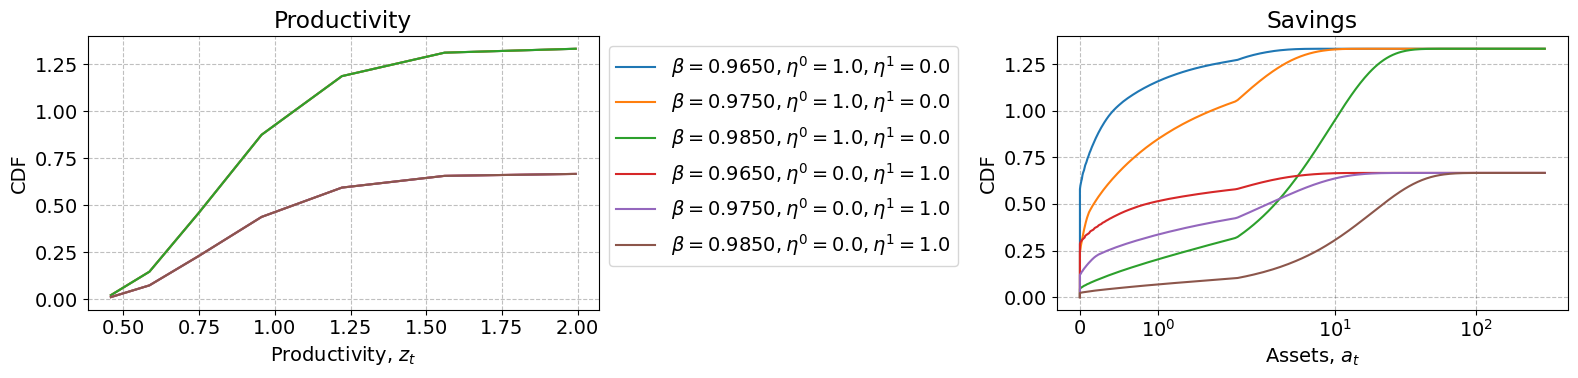

In [31]:
fig = plt.figure(figsize=(16, 4), dpi=100)

# a. income
ax = fig.add_subplot(1,2,1)
ax.set_title('Productivity')
for i_beta in range(par.Nfix):  # Assuming Nfix is half of the length of beta_grid
    beta = par.beta_grid[i_beta]
    eta0 = par.eta0_grid[i_beta]
    eta1 = par.eta1_grid[i_beta]
    ax.plot(par.z_grid, np.cumsum(np.sum(ss.D[i_beta], axis=1)) * par.Nfix, 
            label=f'$\\beta = {beta:.4f}, \\eta^0 = {eta0:.1f}, \\eta^1 = {eta1:.1f}$')

ax.set_xlabel('Productivity, $z_{t}$')
ax.set_ylabel('CDF')
ax.legend(loc='upper left',bbox_to_anchor=(1,1)) 
# b. assets
ax = fig.add_subplot(1,2,2)
ax.set_title('Savings')
for i_beta in range(par.Nfix):
    beta = par.beta_grid[i_beta]
    ax.plot(np.insert(par.a_grid, 0, par.a_grid[0]), np.insert(np.cumsum(np.sum(ss.D[i_beta], axis=0)), 0, 0.0) * par.Nfix, 
            label=f'$\\beta = {beta:.4f}$')

ax.set_xlabel('Assets, $a_{t}$')
ax.set_ylabel('CDF')
ax.set_xscale('symlog')

fig.tight_layout()
fig.savefig('figs/distribution.png')


### 3.2. <a id='toc3_2_'></a>[Looking at the stationary equilibrium](#toc0_)

#### 3.2.1. <a id='toc3_2_1_'></a>[Policy functions](#toc0_)

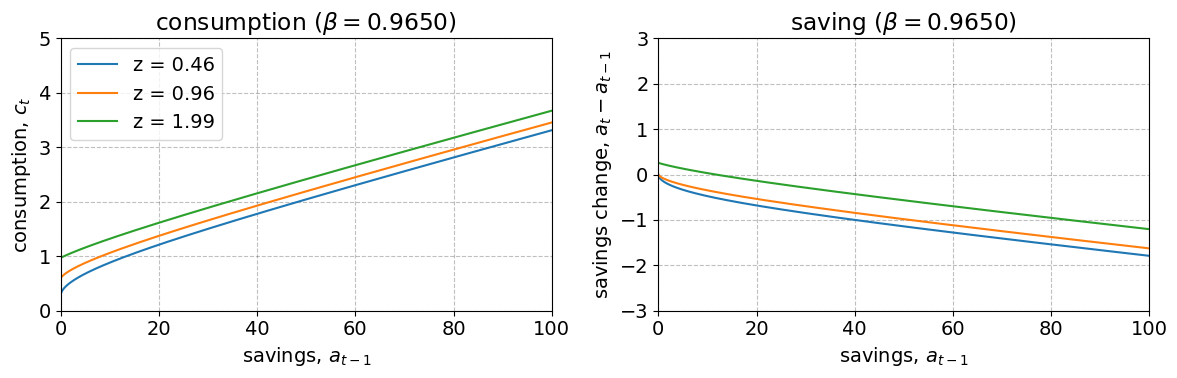

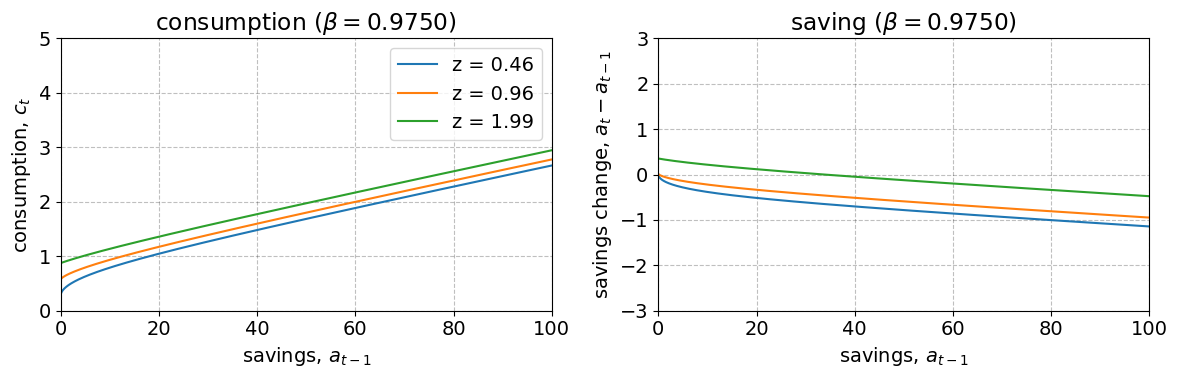

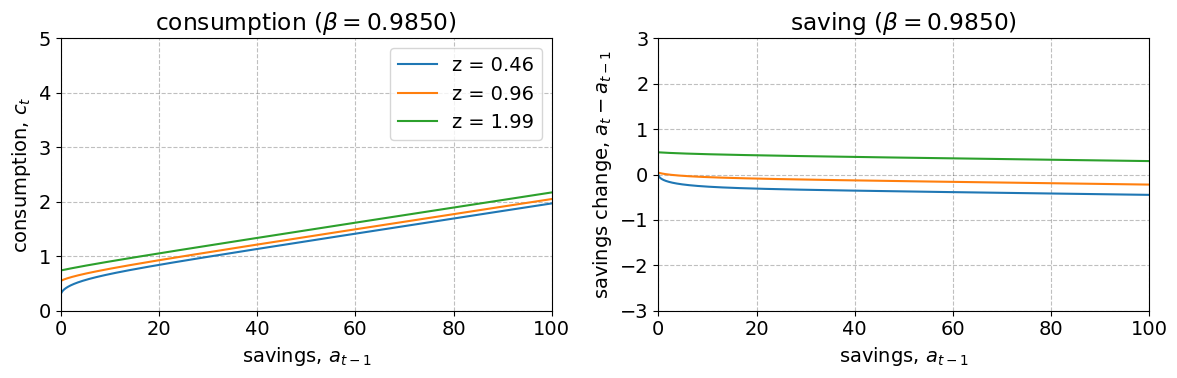

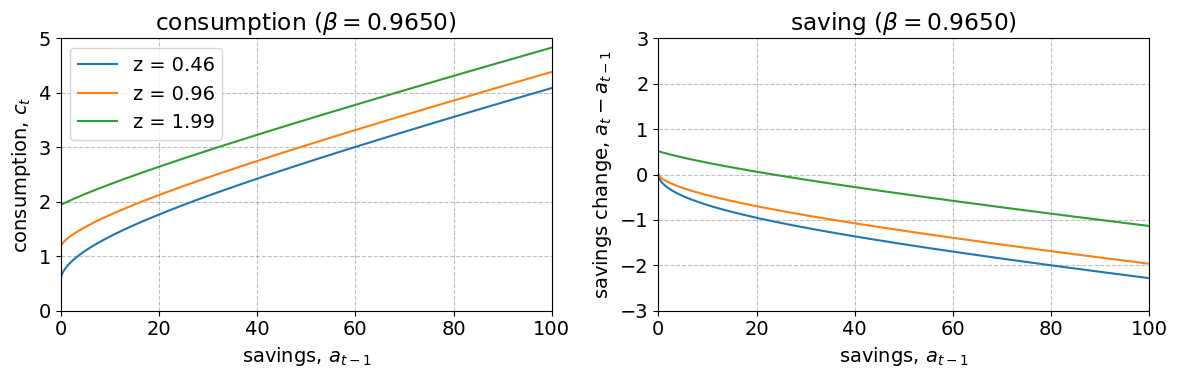

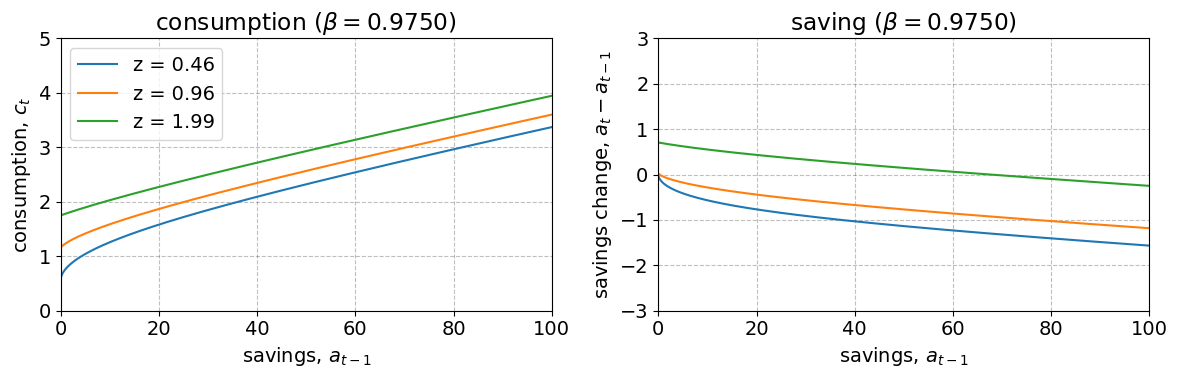

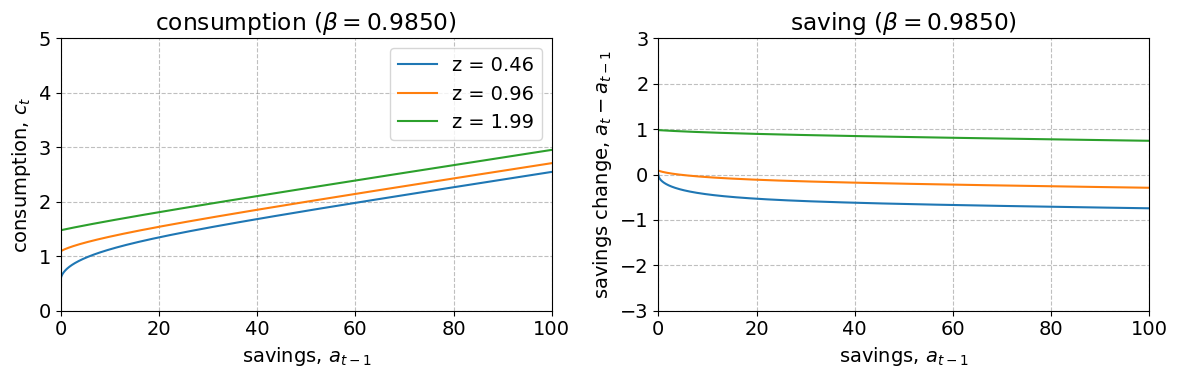

In [13]:
# Loop over beta values
for i_beta, beta in enumerate(par.beta_grid):

    fig = plt.figure(figsize=(12,4),dpi=100)
    I = par.a_grid < 500
    
    # a. consumption
    ax = fig.add_subplot(1,2,1)
    ax.set_title(f'consumption ($\\beta = {beta:.4f}$)')

    for i_z, z in enumerate(par.z_grid):
        if i_z % 3 == 0 or i_z == par.Nz-1:
            ax.plot(par.a_grid[I], ss.c[i_beta, i_z, I], label=f'z = {z:.2f}')
            
    ax.legend(frameon=True)
    ax.set_xlabel('savings, $a_{t-1}$')
    ax.set_ylabel('consumption, $c_t$')
    ax.set_xlim(0,100)
    ax.set_ylim(0,5)

    # b. saving
    ax = fig.add_subplot(1,2,2)
    ax.set_title(f'saving ($\\beta = {beta:.4f})$')

    for i_z, z in enumerate(par.z_grid):
        if i_z % 3 == 0 or i_z == par.Nz-1:
            ax.plot(par.a_grid[I], ss.a[i_beta, i_z, I] - par.a_grid[I], label=f'z = {z:.2f}')

    ax.set_xlabel('savings, $a_{t-1}$')
    ax.set_ylabel('savings change, $a_{t}-a_{t-1}$')
    ax.set_xlim(0,100)
    ax.set_ylim(-3,3)

    fig.tight_layout()
    fig.savefig(f'figs/c_func_{i_beta}.pdf')

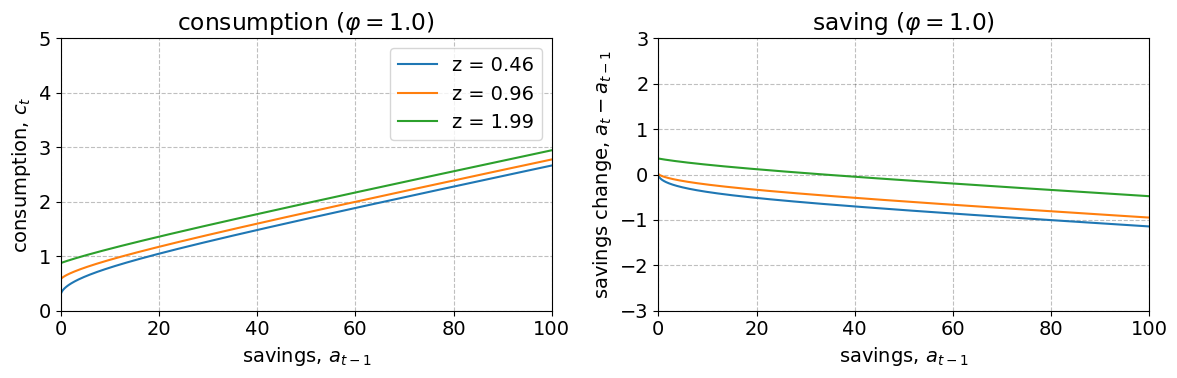

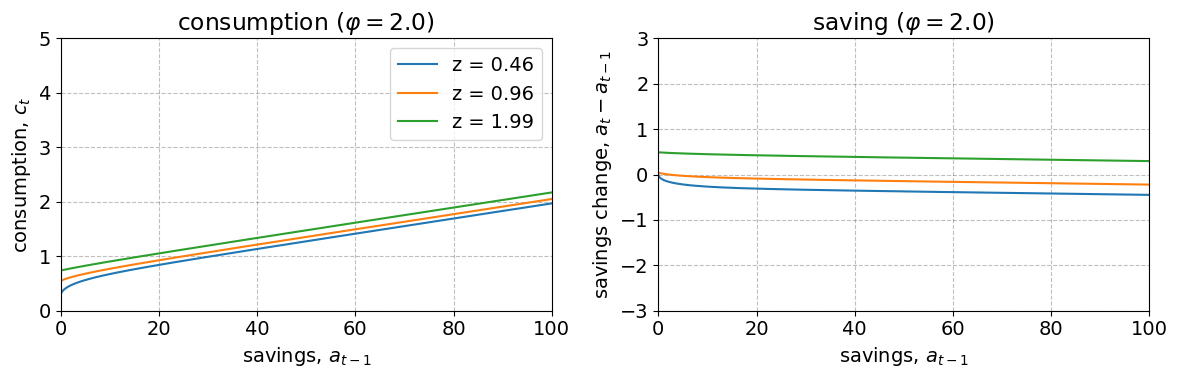

In [14]:
# Loop over phi values
for phi in [1,2]:

    fig = plt.figure(figsize=(12,4),dpi=100)
    I = par.a_grid < 500
    
    # a. consumption
    ax = fig.add_subplot(1,2,1)
    ax.set_title(f'consumption ($\\varphi = {phi:.1f}$)')

    for i_z, z in enumerate(par.z_grid):
        if i_z % 3 == 0 or i_z == par.Nz-1:
            ax.plot(par.a_grid[I], ss.c[phi, i_z, I], label=f'z = {z:.2f}')
            
    ax.legend(frameon=True)
    ax.set_xlabel('savings, $a_{t-1}$')
    ax.set_ylabel('consumption, $c_t$')
    ax.set_xlim(0,100)
    ax.set_ylim(0,5)

    # b. saving
    ax = fig.add_subplot(1,2,2)
    ax.set_title(f'saving ($\\varphi = {phi:.1f})$')

    for i_z, z in enumerate(par.z_grid):
        if i_z % 3 == 0 or i_z == par.Nz-1:
            ax.plot(par.a_grid[I], ss.a[phi, i_z, I] - par.a_grid[I], label=f'z = {z:.2f}')

    ax.set_xlabel('savings, $a_{t-1}$')
    ax.set_ylabel('savings change, $a_{t}-a_{t-1}$')
    ax.set_xlim(0,100)
    ax.set_ylim(-3,3)

    fig.tight_layout()
    fig.savefig(f'figs/c_func_{phi}.pdf')

## 4. <a id='toc3_2_'></a>[Calculating the Jacobians](#toc0_)

In [15]:
model.compute_jacs(do_print=True)

household Jacobians:
one step deviation from steady state calculated in 0.0 secs
curly_Y and curly_D calculated for phi0            in 0.8 secs
curly_Y and curly_D calculated for phi1            in 1.0 secs
curly_Y and curly_D calculated for r               in 0.8 secs
curly_Y and curly_D calculated for w0              in 0.8 secs
curly_Y and curly_D calculated for w1              in 0.8 secs
curly_E calculated in 2.6 secs
builiding blocks combined in 1.7 secs
household Jacobian computed in 8.5 secs

full Jacobians:
full Jacobian to unknowns computed in 1.8 secs [in evaluate_blocks(): 0.8 secs]
full Jacobian to shocks computed in 1.3 secs [in evaluate_blocks(): 0.7 secs]


### 4.1. <a id='toc3_2_'></a>[The Jacobians](#toc0_)

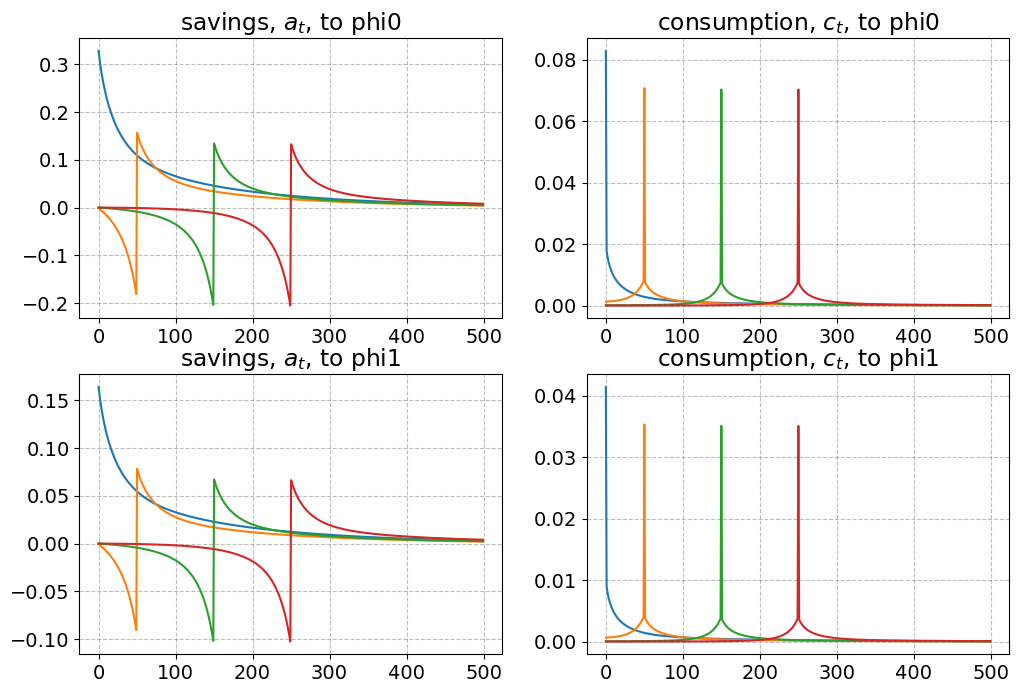

In [39]:
fig = plt.figure(figsize=(12,len(model.inputs_hh_all[3:5])*4),dpi=100)

i = 0
for varname in model.inputs_hh[3:5]:
    
    # a. savings
    i += 1    
    ax = fig.add_subplot(len(model.inputs_hh_all[3:5]),2,i)
    ax.set_title(f'savings, $a_t$, to {varname}')
    for s in [0,50,150,250]:
        jac_hh_var = model.jac_hh[('A_hh',varname)]
        ax.plot(np.arange(par.T),jac_hh_var[:,s],label=f'shock at {s}')
    
    # ax.legend(frameon=True,bbox_to_anchor=(0.0,0.0))

    # b. consumption
    i += 1    
    ax = fig.add_subplot(len(model.inputs_hh_all[3:5]),2,i)
    ax.set_title(f'consumption, $c_t$, to {varname}')
    for s in [0,50,150,250]:
        jac_hh_var = model.jac_hh[('C_hh',varname)]
        ax.plot(np.arange(par.T),jac_hh_var[:,s],label=f'shock at {s}')
    
fig.savefig(f'figs/jacobians.png')

## 5. <a id='toc3_2_'></a>[Finding transitionpath](#toc0_)
### 5.1 <a id='toc3_2_'></a>[Temporary shock to $\varphi_1$](#toc0_)

In [17]:
# find transition path
dphi1 = np.zeros(par.T)
dphi1[10:20] = 0.1*par.phi1_ss #10% shock to phi_1
shocks = {'dphi1':dphi1} # note the 'd' for difference (in absolute terms)
model.find_transition_path(shocks=shocks,do_print=True)

finding the transition path:
 it =   0 -> max. abs. error = 2.06e-01
   2.06e-01 in clearing_A
   2.12e-14 in clearing_L0
   6.67e-02 in clearing_L1
 it =   1 -> max. abs. error = 2.27e-02
   2.27e-02 in clearing_A
   3.66e-15 in clearing_L0
   7.44e-15 in clearing_L1
 it =   2 -> max. abs. error = 9.27e-04
   9.27e-04 in clearing_A
   3.33e-16 in clearing_L0
   4.44e-16 in clearing_L1
 it =   3 -> max. abs. error = 2.94e-06
   2.94e-06 in clearing_A
   3.33e-16 in clearing_L0
   3.33e-16 in clearing_L1
 it =   4 -> max. abs. error = 2.25e-08
   2.25e-08 in clearing_A
   6.66e-16 in clearing_L0
   3.33e-16 in clearing_L1
 it =   5 -> max. abs. error = 7.20e-11
   7.20e-11 in clearing_A
   3.33e-16 in clearing_L0
   4.44e-16 in clearing_L1

transition path found in 6.1 secs


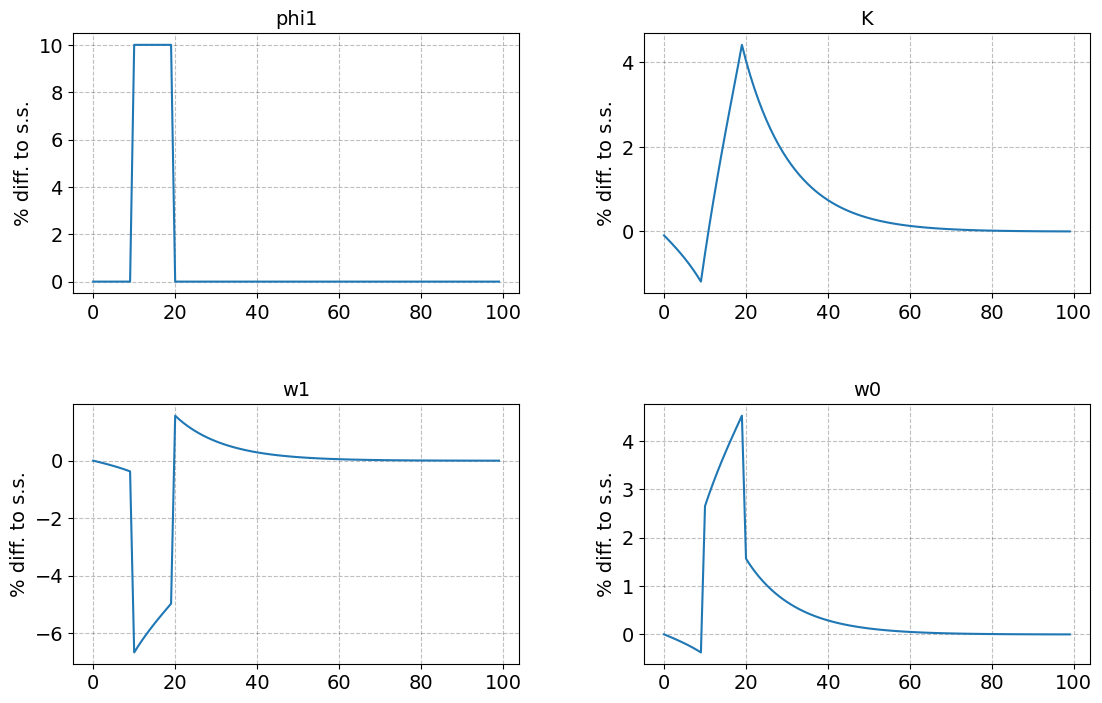

In [45]:
model.show_IRFs(['phi1','K','w1','w0'],T_max=100,do_shocks=False,do_targets=False,ncols=2,filename='figs/10_period_phi1_shock')

['r']
household problem solved along transition path in 0.6 secs
household problem simulated along transition in 0.2 secs

['phi1']
household problem solved along transition path in 0.5 secs
household problem simulated along transition in 0.3 secs

['phi0']
household problem solved along transition path in 0.5 secs
household problem simulated along transition in 0.2 secs

['w0']
household problem solved along transition path in 0.5 secs
household problem simulated along transition in 0.2 secs

['w1']
household problem solved along transition path in 0.5 secs
household problem simulated along transition in 0.2 secs

None
household problem solved along transition path in 0.5 secs
household problem simulated along transition in 0.2 secs

all
household problem solved along transition path in 0.4 secs
household problem simulated along transition in 0.2 secs



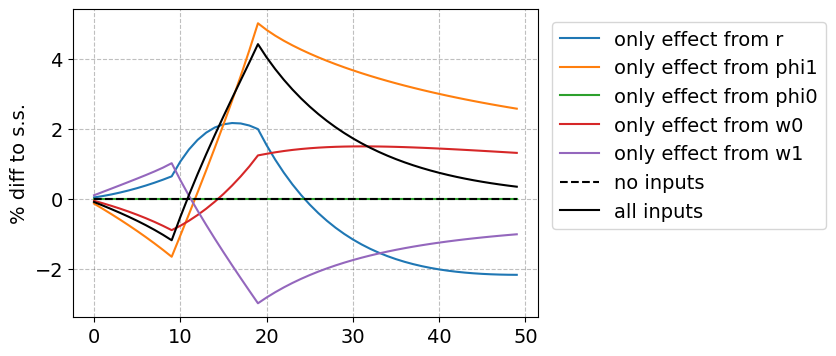

In [19]:
T_max = 100

fig = plt.figure(figsize=(6,4),dpi=100)
ax = fig.add_subplot(1,1,1)
    
i_color = 0
for use_inputs in [['r'],['phi1'],['phi0'],['w0'],['w1'],None,'all']:
    
    # a. compute
    print(use_inputs)
    path_alt = model.decompose_hh_path(do_print=True,use_inputs=use_inputs)
    print('')
    
    # b. plot
    if use_inputs is None:
        label = 'no inputs'
        ls = '--'
        color = 'black'
    elif use_inputs == 'all':
        label = 'all inputs'
        ls = '-'
        color = 'black'
    else:
        label = f'only effect from {use_inputs[0]}'
        ls = '-'
        color = colors[i_color]
        i_color += 1
        
    ax.plot((path_alt.A_hh[:50]/ss.A_hh-1)*100,ls=ls,color=color,label=label);

ax.set_ylabel('% diff to s.s.')
ax.legend(frameon=True,bbox_to_anchor=(1.01,0.99));

### 5.2 <a id='toc3_2_'></a>[Permanent shock to $\varphi_1$](#toc0_)

Adjust distribution

In [46]:
model_ = model.copy()
model_.par.phi1_ss = par.phi1_ss*(1+0.1)
model_.find_ss(do_print=False)

# b. find transition path
model_.find_transition_path(shocks=[],ini=model.ss.__dict__,do_print=False)

r: terminal value is   0.01239958, but ss value is   0.01239972


In [49]:
def print_v(model,model_):

        # steady state    
        v_hh_ss = model_.v_ss()

        # along transition path
        v_hh = model.v_ss()

        # difference
        print(f'phi1 {model.ss.phi1:.3} -> {model_.ss.phi1:.3f}: {v_hh-v_hh_ss = :8.5f}')

print_v(model,model_)

phi1 2.0 -> 2.200: v_hh-v_hh_ss = -0.02254


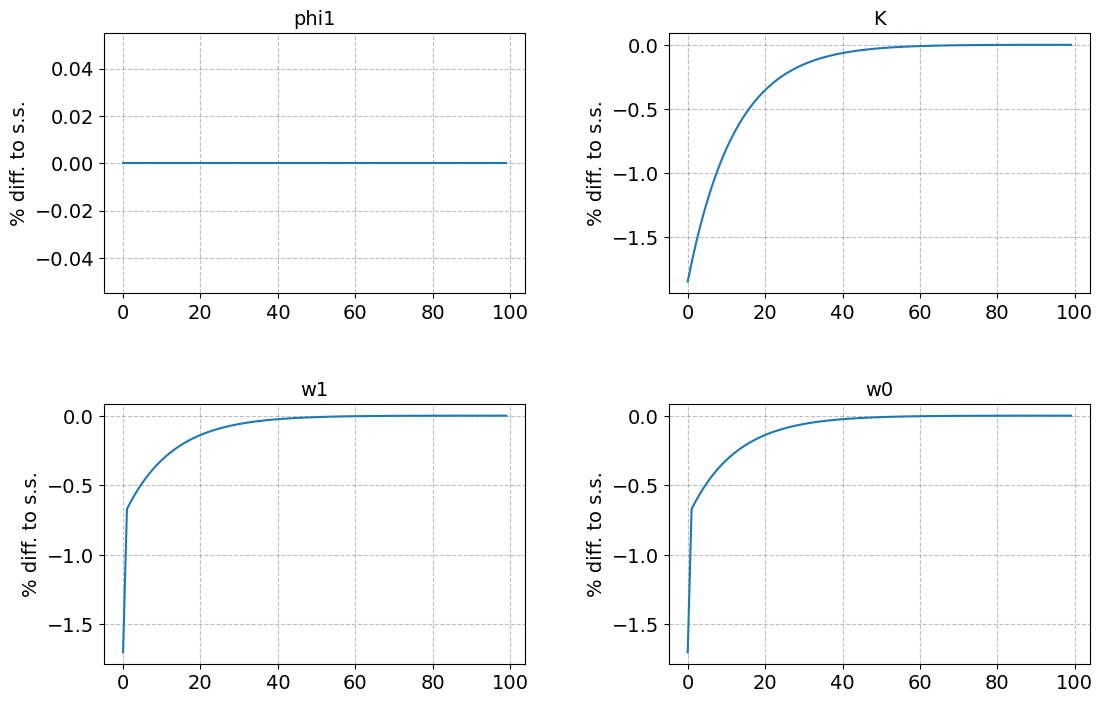

In [51]:
model_.show_IRFs(['phi1','K','w1','w0'],T_max=100,do_shocks=False,do_targets=False,ncols=2,filename='figs/phi1_shock.png')